## Get data

In [1]:
!gdown 1UxKrIt_NlstgXnIbAcSr1vwHlVMPfRF2

Downloading...
From: https://drive.google.com/uc?id=1UxKrIt_NlstgXnIbAcSr1vwHlVMPfRF2
To: /content/recordings.tgz
100% 465M/465M [00:02<00:00, 209MB/s]


untar file

In [ ]:
!tar -xzvf /content/recordings.tgz

get xls file with description for each audio file

In [3]:
!gdown 1UNh9fROnTopHQIbZIEcTZW2FUJQWLhde

Downloading...
From: https://drive.google.com/uc?id=1UNh9fROnTopHQIbZIEcTZW2FUJQWLhde
To: /content/recordings_emmanouela.xlsx
100% 26.7k/26.7k [00:00<00:00, 34.2MB/s]


## Set up environment and functions

module for Amplitude Modulation Analysis

In [4]:
!git clone https://github.com/MuSAELab/amplitude-modulation-analysis-module.git

Cloning into 'amplitude-modulation-analysis-module'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 143 (delta 0), reused 1 (delta 0), pack-reused 140
Receiving objects: 100% (143/143), 785.74 KiB | 10.76 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [149]:
!pip install /content/amplitude-modulation-analysis-module

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./amplitude-modulation-analysis-module
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for am-analysis: filename=am_analysis-0.1-py3-none-any.whl size=20037 sha256=aec60ac550eaaae85c622a409049f56e77906d707ca4a5a4dba0f8f1ceb1eca7
  Stored in directory: /root/.cache/pip/wheels/aa/76/b8/2732d7b7c13056fe54c9e5d5ca19ce86a8c474ad499eec0e14
Successfully built am-analysis
  Attempting uninstall: am-analysis
    Found existing installation: am-analysis 0.1
    Uninstalling am-analysis-0.1:
      Successfully uninstalled am-analys

import useful stuff

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import hilbert, butter, lfilter, freqz
from scipy import signal as sig
import pandas as pd

import librosa
import librosa.display
import IPython.display as ipd

import os

from am_analysis import am_analysis as ama

## choose a signal to work on

In [152]:

df = pd.read_excel('recordings_emmanouela.xlsx')

display(df)

,file_name,species,individuals,chick stage,type
0,LT07 two barbets 17102009,Black-collared Barbet,2,stage 4,host1_brood
1,LT12 4 barbets 31202009,Black-collared Barbet,4,NaN,host1_brood
2,LT38 four barbets 15112010,Black-collared Barbet,4,stage 4,host1_brood
3,111113_0028,Black-collared Barbet,1,stage 1,host1_single
4,LT35_barbethatchling_05112011a,Black-collared Barbet,1,stage 1,host1_single
...,...,...,...,...,...
79,MP023 honeyguide begging 27102008,Greater Honeyguide,1,stage 2,parasite2_single
80,MP024 pipping honeyguide part A 24102008,Greater Honeyguide,1,stage 2,parasite2_single
81,MP024 pipping honeyguide part B 24102008,Greater Honeyguide,1,stage 0,parasite2_single
82,MP028 honeyguide begging 25102008,Greater Honeyguide,1,stage 0,parasite2_single


In [ ]:
!ls /content/recordings/parasite1_single/LT11_honeyguide_begging_28102010.wav

In [153]:
audiofile = '/content/recordings/parasite1_single/LT11_honeyguide_begging_28102010.wav'

total audio duration of file /content/recordings/parasite1_single/LT11_honeyguide_begging_28102010.wav is : 44.46s


[]

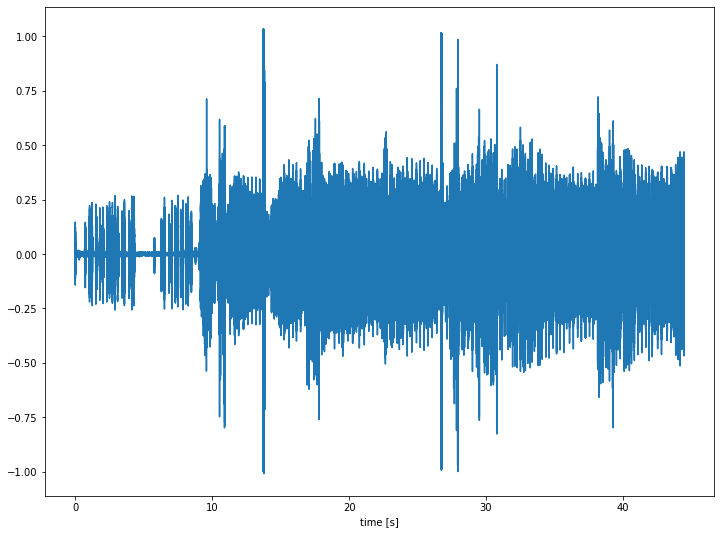

In [154]:
signal_full, sr = librosa.load(audiofile)
print(f'total audio duration of file {audiofile} is : {len(signal_full)/sr:.2f}s')

t = np.linspace(0,len(signal_full)/sr, len(signal_full))
plt.figure(figsize=(12,9))
plt.plot(t, signal_full)
plt.xlabel('time [s]')
plt.plot()

[]

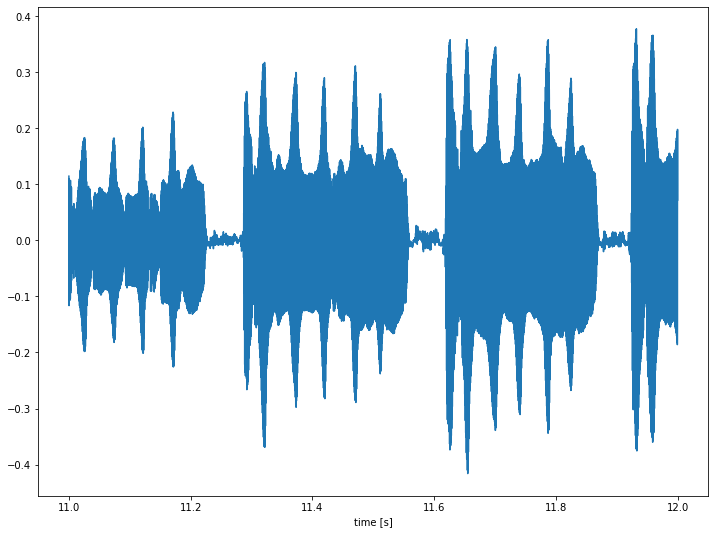

In [155]:
# choose a clip of the full audio file.
# start at signal_start seconds
# and get a clip of duration signal_duration seconds
signal_start = 11
signal_duration = 1

signal = signal_full[signal_start*sr:(signal_start + signal_duration)*sr]

t = np.linspace(signal_start,signal_start+signal_duration, len(signal))
plt.figure(figsize=(12,9))
plt.plot(t, signal)
plt.xlabel('time [s]')
plt.plot()

## Modulation Spectrogram of original signal

Plot the modulation spectrograms of the full or clipped audio file

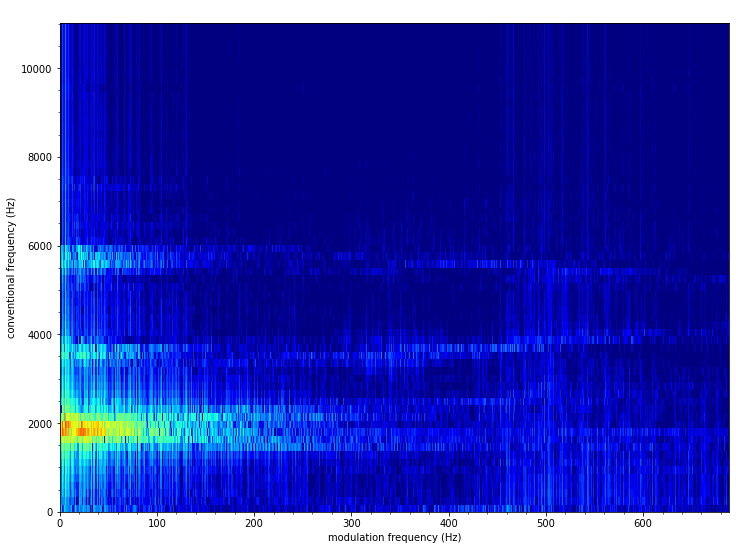

In [156]:

window_size = 128
window_shift = 16

#choose signal_full or signal as input
ama_input = signal

rfft_mod = ama.strfft_modulation_spectrogram(ama_input,
                                             sr,
                                             window_size,
                                             window_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')


plt.figure(figsize=(12,9))
ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
plt.show()

## Filter bank original signal

create bandpass (Butterworth) filter

In [157]:

def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [188]:
freq_range = [40,10900]

freqs = np.linspace(freq_range[0],freq_range[1],5)
freqs

array([   40.,  2755.,  5470.,  8185., 10900.])

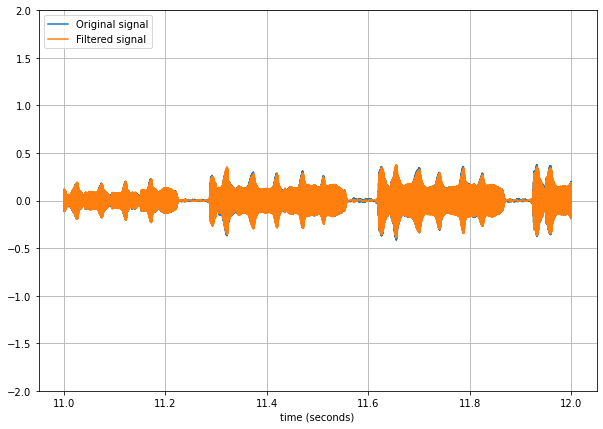

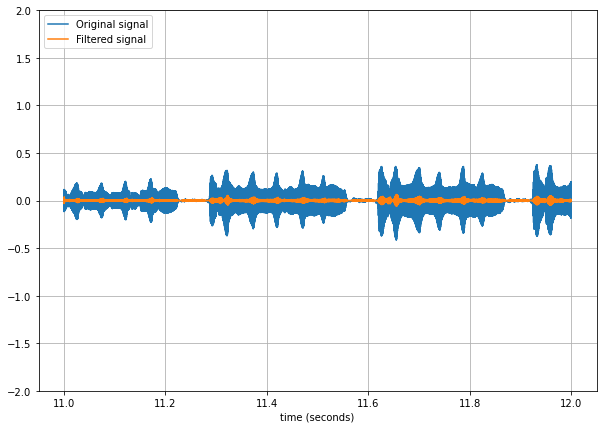

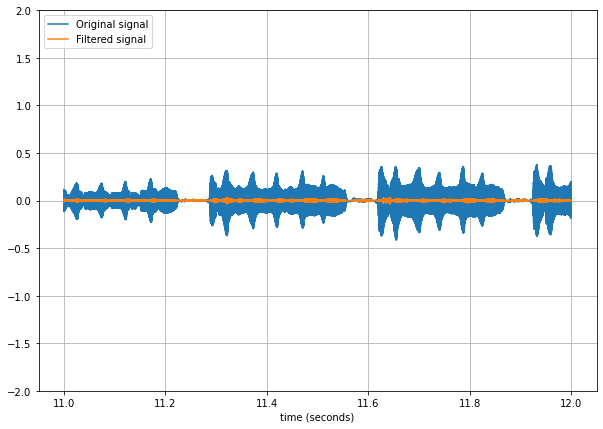

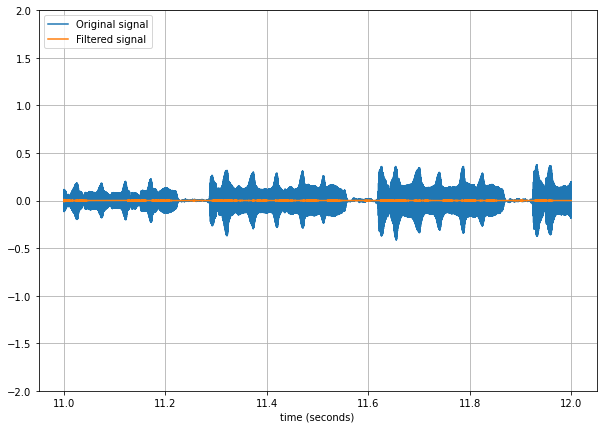

In [189]:
# apply butterworth (bandpass) filter and plot results
t = np.linspace(signal_start, signal_start + signal_duration, len(signal), endpoint=False)


bp_signal = []
for i in range(len(freqs)-1):
  lowcut = freqs[i]
  highcut = freqs[i+1]

  bp_signal.append(butter_bandpass_filter(signal, lowcut, highcut, sr, order=6))

  plt.figure(figsize=(10,7))
  plt.clf()
  plt.plot(t, signal, label='Original signal')
  plt.plot(t, bp_signal[i], label='Filtered signal' )
  plt.xlabel('time (seconds)')
  plt.grid(True)
  plt.axis('tight')
  plt.ylim([-2,2])
  plt.legend(loc='upper left')
  plt.show()


## Get Amplitude Envelope

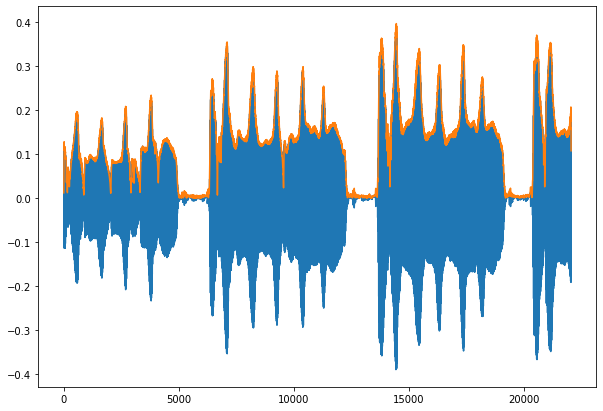

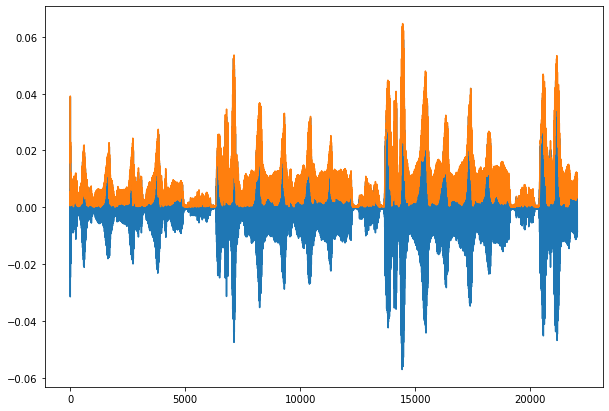

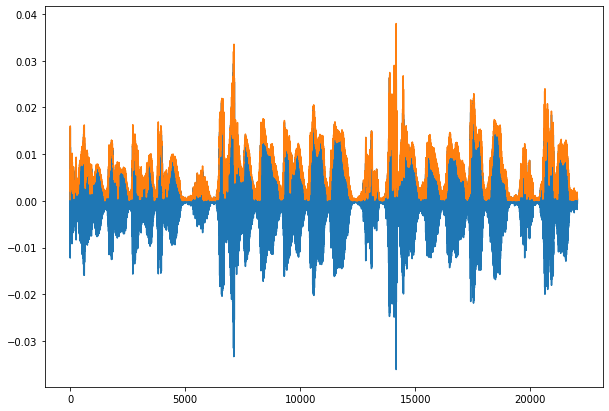

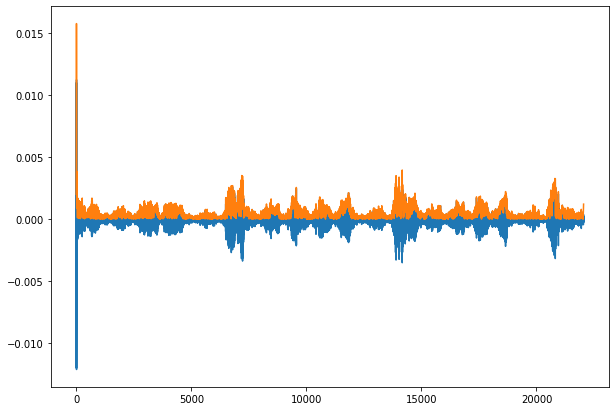

In [190]:
# get the signal A.E. using hilbert transform
amp_env = []
for s in bp_signal:
  z = (hilbert(s)) #form the analytical signal
  amp_env.append(np.abs(z)) #envelope extraction
  inst_phase = np.unwrap(np.angle(z))#inst phase
  inst_freq = np.diff(inst_phase)/(2*np.pi)*sr #inst frequency

  plt.figure(figsize=(10,7))
  plt.plot(s)
  plt.plot(amp_env[-1])
  #plt.ylim([-0.5,0.5])
  plt.show()

## Lowpass AE using FIR filter 

In [191]:
def lowpass(input, fs, fc, bandwidth, ripple_db=65.0):
        """
        Designs a FIR filter that is a low-pass filter.
        fs : sampling frequency (Hz)
        fc : cut-off frequency (Hz)
        bandwidth : transition bandwidth (Hz)s
        """
        # Compute the order and Kaiser parameter for the FIR filter.
        N, beta = sig.kaiserord(ripple_db, bandwidth / (fs * 0.5) )

        # Use firwin with a Kaiser window to create a lowpass FIR filter.
        taps = sig.firwin(N, fc / (fs * 0.5), window=('kaiser', beta))

        # the filter must be symmetric, in order to be zero-phase
        assert np.all(np.abs(taps - taps[::-1]) < 1e-15)

        input_filt = sig.filtfilt(taps, 1, input)

        return input_filt

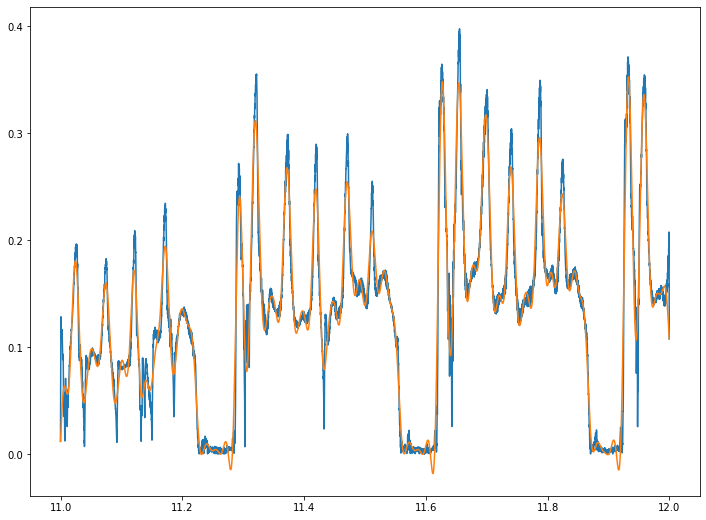

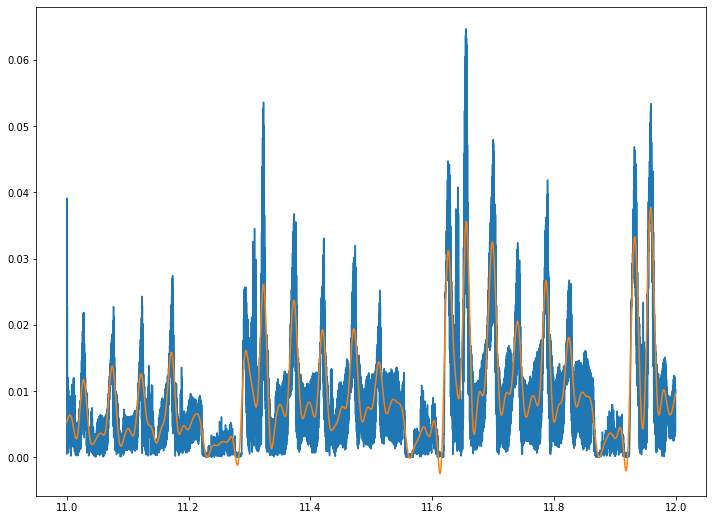

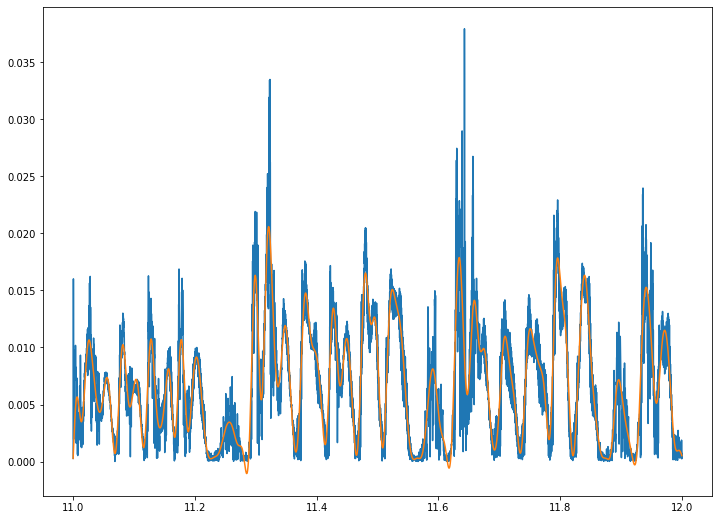

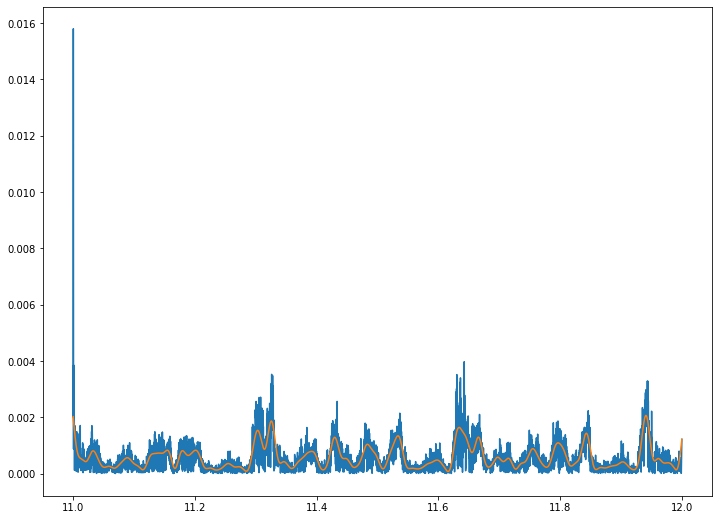

In [192]:

# cut-off frequency (upper bound)
fc=64
bandwidth=50
ripple_db=60.0

ae_lowpass=[]
for ae in amp_env:
  ae_lowpass.append(lowpass(ae, sr, fc, bandwidth,ripple_db))
  plt.figure(figsize=(12,9))
  plt.plot(t,ae)
  plt.plot(t,ae_lowpass[-1])
  plt.show()

## Modify original BP signal with new envelope

In [193]:
envR  = [i / j for i, j in zip(ae_lowpass , amp_env)]
filt_bp_signal = [ i * j for i,j in zip(bp_signal, envR)]

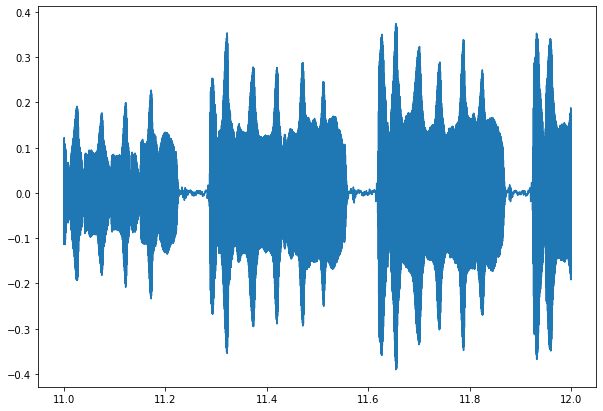

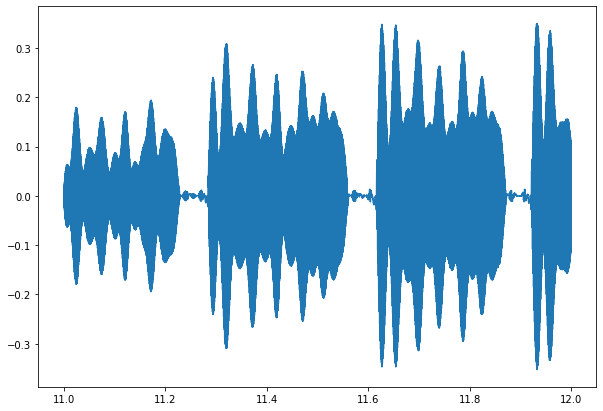

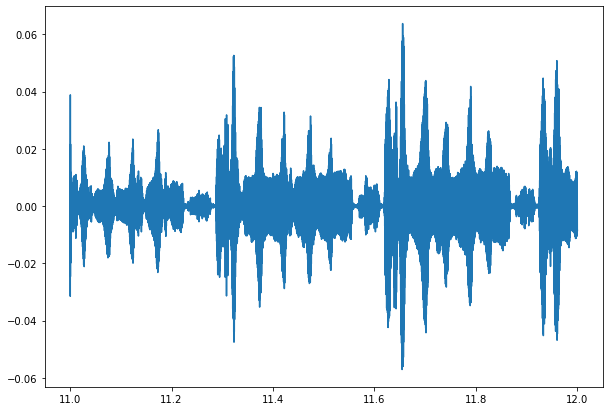

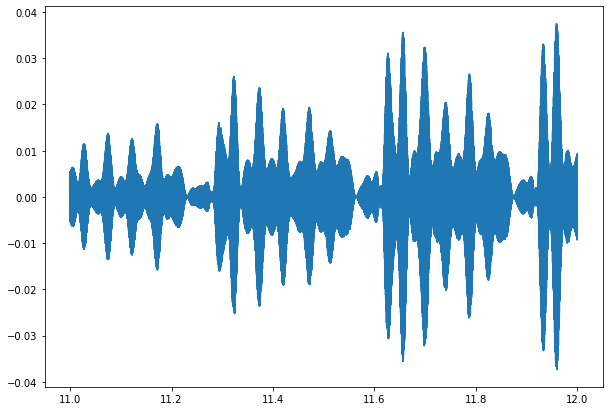

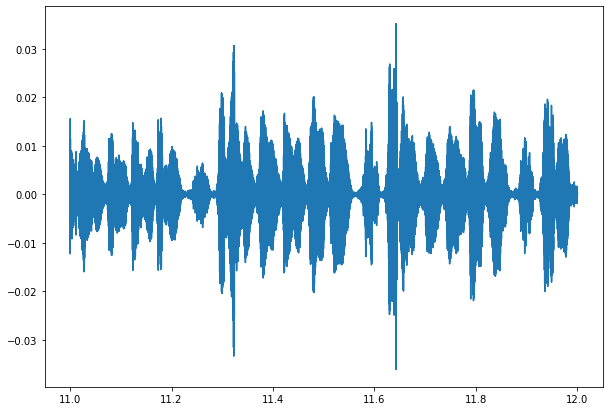

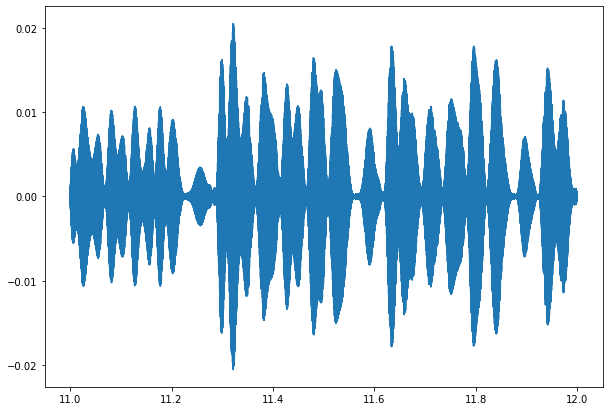

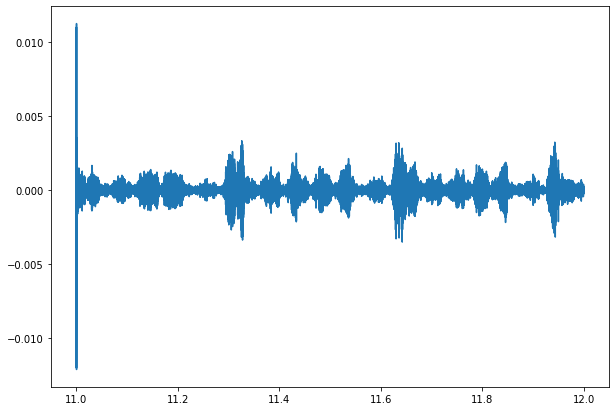

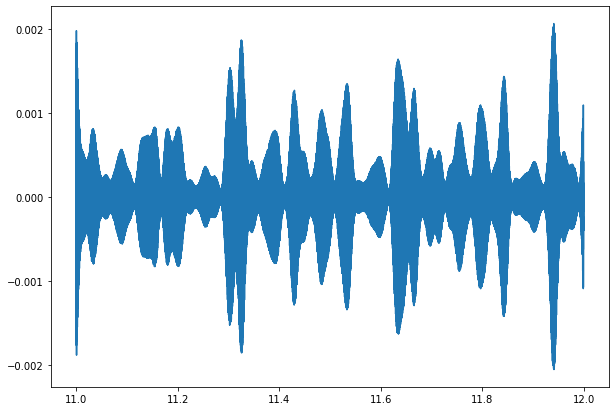

In [194]:

for i in range(len(filt_bp_signal)):
  
  plt.figure(figsize=(10,7))
  plt.figure(1)
  plt.plot(t,bp_signal[i])
  plt.figure(figsize=(10,7))
  plt.figure(2)
  plt.plot(t,filt_bp_signal[i])
  plt.show()


## Sum all modified bandpass signals

In [195]:
mod_signal=sum(filt_bp_signal)

In [186]:
filt_bp_signal[0]

array([1.60641157e-06, 2.82035280e-05, 1.58531288e-04, ...,
       4.78083108e+64, 4.81767127e+64, 3.61218224e+64])

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(signal)
plt.plot(mod_signal)
plt.ylim([-1,1])

## Compare modulation spectrograms

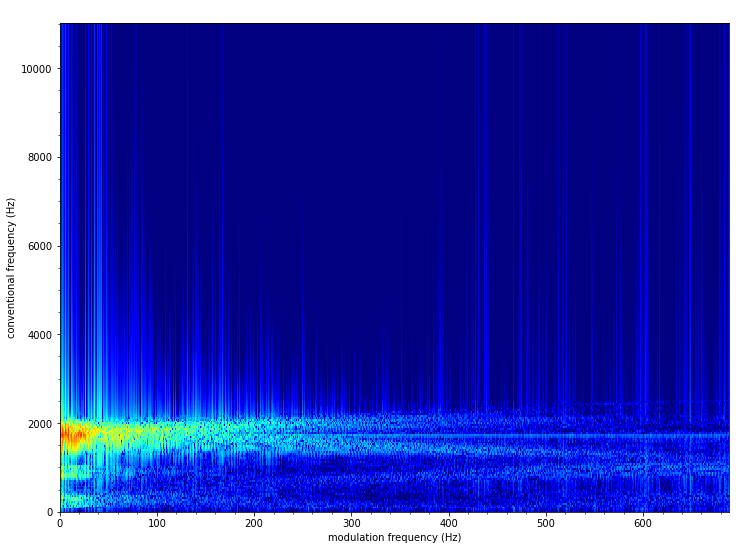

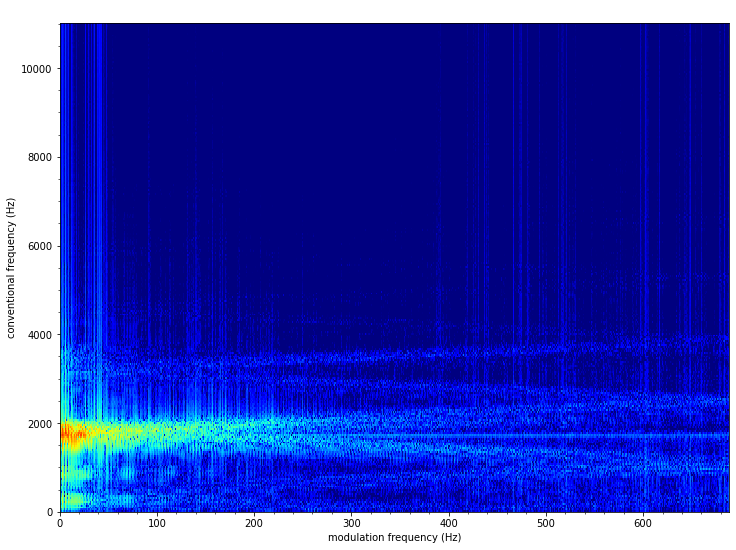

In [89]:
window_size = 512
window_shift = 16

#Original signal
ama_input = bp_signal

rfft_mod = ama.strfft_modulation_spectrogram(ama_input,
                                             sr,
                                             window_size,
                                             window_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')


plt.figure(figsize=(12,9))
ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])
plt.show()


# Modified signal

ama_input = filt_bp_signal

rfft_mod = ama.strfft_modulation_spectrogram(ama_input,
                                             sr,
                                             window_size,
                                             window_shift,
                                             channel_names=' ',
                                             win_function_y='boxcar',
                                             win_function_x='boxcar')


plt.figure(figsize=(12,9))
ama.plot_modulation_spectrogram_data(rfft_mod, c_map='jet')#,modf_range=[1,40])

plt.show()